## Regression with Categorical Outcome Variable: NBA Data Set

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [4]:
#Import Data
NBA = pd.read_csv("Assignment Data/NBA_Games2.csv")

# Display Data
display(NBA[0:10])

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN
0,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900072,2019-07-12,...,13,23,36,14,15,3,12,24,8.0,1
1,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900060,2019-07-11,...,9,28,37,19,10,8,22,25,-5.0,0
2,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900042,2019-07-09,...,7,27,34,17,5,5,18,21,18.2,1
3,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900023,2019-07-07,...,9,27,36,7,7,10,18,28,-24.0,0
4,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900013,2019-07-06,...,9,30,39,13,11,6,13,21,2.0,0
5,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801220,2019-04-10,...,22,39,61,29,5,7,17,25,-1.0,0
6,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801202,2019-04-07,...,9,39,48,25,2,3,11,28,-8.0,0
7,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801181,2019-04-05,...,10,28,38,21,16,4,14,21,-36.0,0
8,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801168,2019-04-03,...,11,33,44,29,7,7,11,26,8.0,1
9,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801162,2019-04-02,...,11,32,43,26,13,2,11,18,-6.0,0


In [5]:
# DATA PREP

# DATA NEEDS CLEANING

#filter 2017 regular season records and select columns to be used for analysis
# Note: all preseason games are recordereed with GAME_ID Larger then 100000000

NBA17 = NBA[(NBA.SEASON_ID == 22017) & (NBA.GAME_ID < 1000000000)]
display(NBA17[0:10])

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN
101,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701214,2018-04-10,...,8,31,39,27,10,3,10,24,-8.0,0
102,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701202,2018-04-08,...,5,32,37,23,7,4,13,19,6.0,1
103,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701184,2018-04-06,...,7,43,50,24,5,5,18,22,6.0,1
104,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701172,2018-04-04,...,10,38,48,20,5,6,15,16,-29.0,0
105,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701158,2018-04-03,...,12,37,49,24,10,1,15,15,-3.0,0
106,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701147,2018-04-01,...,5,47,52,33,0,3,14,15,6.0,1
107,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701130,2018-03-30,...,15,44,59,24,9,4,16,14,-10.0,0
108,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701120,2018-03-28,...,4,33,37,26,10,2,19,22,-6.0,0
109,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701101,2018-03-25,...,7,38,45,18,5,2,13,14,-19.0,0
110,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701087,2018-03-23,...,5,39,44,24,5,5,11,14,-12.0,0


In [6]:
# Display columns of the data
NBA17.columns

Index(['CITY', 'TEAM_NAME', 'TEAM_ID', 'NICKNAME', 'STATE', 'YEAR_FOUNDED',
       'SEASON_ID', 'TEAM_ABBREVIATION', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS', 'WIN'],
      dtype='object')

In [7]:
# select columns for forecasting model
NBA17= NBA17[['GAME_ID', 'MATCHUP', 'PTS', 'PLUS_MINUS', 'WIN']]
NBA17.head()
NBA17.shape

(2378, 5)

# #### Step 2. Manipulate the MATCHUP column to obtain records for each team\n",
    "The strings in MATCHUP column is separated at space (\" \"), and this column should be used for two purposes. Firstly, we will distinguish two teams played in a game as we need to incorporate the salary information for both teams in a match. Secondly, we need to figure out if the game was played at home or away. It should be noted that the data were encoded from the perspective of a team appeared first in the MATCHUP column. So if the match is encoded with \"vs\", it indicates that the team appeared before \"vs\" is played at home and if the match is encoded with \"@\", the team played away. Let's take an example of \"ATL vs. IND\" in a match column. In this case, ATL is a home team and IND is a away team.    "The command lines below return a data frame with all separated strings in diffrent columns. The resulting dataframe, named \"match\", is then used to create new columns and the old column (i.e., MATCHUP) sholud be dropped from nba18 data frame once all the columns are added to the nba18 dataframe."

In [8]:
# new dataframe with split values columns from MAtchup
match = NBA['MATCHUP'].str.split(" ", n =2, expand = True)
match.head()

,0,1,2
0,ATL,@,SAS
1,ATL,@,WAS
2,ATL,vs.,IND
3,ATL,vs.,MIN
4,ATL,@,MIL


In [9]:
# Make sepearte columns in data frame 
NBA17['team']= match[0]
NBA17['opp']= match[2]

# make sepearte teams column in nba 
NBA17['home_away']= match[1]

# drop old colum
NBA17.drop('MATCHUP', axis=1, inplace=True)

In [10]:
NBA17.head()

,GAME_ID,PTS,PLUS_MINUS,WIN,team,opp,home_away
101,21701214,113,-8.0,0,ATL,PHI,vs.
102,21701202,112,6.0,1,ATL,BOS,@
103,21701184,103,6.0,1,ATL,WAS,@
104,21701172,86,-29.0,0,ATL,MIA,vs.
105,21701158,98,-3.0,0,ATL,MIA,@


#### Step 3. Create a dummy variable denoting if the team played at home (vs.) or away (@).

In [11]:
# create dummy variable 
NBA17['HOME']= NBA17['home_away'].apply(lambda x: 1 if x =='vs.' else 0)
NBA17.head()

,GAME_ID,PTS,PLUS_MINUS,WIN,team,opp,home_away,HOME
101,21701214,113,-8.0,0,ATL,PHI,vs.,1
102,21701202,112,6.0,1,ATL,BOS,@,0
103,21701184,103,6.0,1,ATL,WAS,@,0
104,21701172,86,-29.0,0,ATL,MIA,vs.,1
105,21701158,98,-3.0,0,ATL,MIA,@,0


In [12]:
# drop home_away column
NBA17.drop('home_away', axis=1, inplace=True)
NBA17.head()

,GAME_ID,PTS,PLUS_MINUS,WIN,team,opp,HOME
101,21701214,113,-8.0,0,ATL,PHI,1
102,21701202,112,6.0,1,ATL,BOS,0
103,21701184,103,6.0,1,ATL,WAS,0
104,21701172,86,-29.0,0,ATL,MIA,1
105,21701158,98,-3.0,0,ATL,MIA,0


### 1.3) Add cumulative points and cumulative points against for each team to the NBA17 dataset

In [13]:
# sort values by GANE UD 
NBA17= NBA17.sort_values(by= 'GAME_ID')

# create new column named PTS_AGIN for creating the Pyth
NBA17['PTS_AGN']= NBA17['PTS'] - NBA17['PLUS_MINUS']

# calculate cumulative PTS and PTS_AGN for each team
NBA17['cumPTS']= NBA17.groupby(['team'])['PTS'].apply(lambda x: x.cumsum())
NBA17['cumPTS_AGN']= NBA17.groupby(['team'])['PTS_AGN'].apply(lambda x:x.cumsum())

# head of data frame
NBA17.head()

,GAME_ID,PTS,PLUS_MINUS,WIN,team,opp,HOME,PTS_AGN,cumPTS,cumPTS_AGN
1501,21700001,102,3.0,1,CLE,BOS,1,99.0,102,99.0
846,21700001,99,-3.0,0,BOS,CLE,0,102.0,99,102.0
5328,21700002,122,1.0,1,HOU,GSW,0,121.0,122,121.0
4630,21700002,121,-1.0,0,GSW,HOU,1,122.0,121,122.0
18110,21700003,90,-12.0,0,CHA,DET,0,102.0,90,102.0


### 1.4) Add Pythagorean winning % to the NBA17 dataset, name pyth_wpc

In [14]:
NBA17['pyth_wpc']= NBA17['cumPTS']**2 / (NBA17['cumPTS'] **2 + NBA17['cumPTS_AGN']**2)
NBA17.head()

,GAME_ID,PTS,PLUS_MINUS,WIN,team,opp,HOME,PTS_AGN,cumPTS,cumPTS_AGN,pyth_wpc
1501,21700001,102,3.0,1,CLE,BOS,1,99.0,102,99.0,0.514922
846,21700001,99,-3.0,0,BOS,CLE,0,102.0,99,102.0,0.485078
5328,21700002,122,1.0,1,HOU,GSW,0,121.0,122,121.0,0.504115
4630,21700002,121,-1.0,0,GSW,HOU,1,122.0,121,122.0,0.495885
18110,21700003,90,-12.0,0,CHA,DET,0,102.0,90,102.0,0.437743


## 2 RUNNING REGRESSION (LPM VS Logistic Regression)

### 2.1) Fit LPM of win (W vs L) on Pythagorean Winning Percentage (pyth wpct)

In [15]:
LPM= smf.ols(formula= 'WIN ~pyth_wpc', data=NBA17).fit()
print(LPM.summary())

                            OLS Regression Results                            
Dep. Variable:                    WIN   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     268.7
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           2.65e-57
Time:                        18:32:04   Log-Likelihood:                -1598.5
No. Observations:                2378   AIC:                             3201.
Df Residuals:                    2376   BIC:                             3213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6461      0.192    -13.772      0.0

### 2.2) What are some issues with LPM

Text(0.5, 1.0, 'Pythagorean Win % and Win-Record')

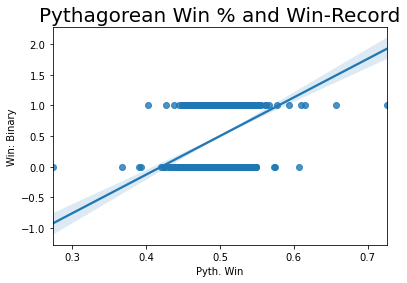

In [16]:
# plot LPM to articulare problems with categorical outcome variables
## create a scatter plot to explore the relationship between IV (pyth_wpc) and DV (Win)

sns.regplot(x='pyth_wpc', y='WIN', data=NBA17)
plt.xlabel("Pyth. Win")
plt.ylabel('Win: Binary')
plt.title('Pythagorean Win % and Win-Record', fontsize=20)

### 3. Logistic Regression

### 3.1) Import libraries 

In [18]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 3.2) Fit a logistic Regression of win on pyth_wpc & print outcomes

In [19]:
# Specify the model and save it onto the object name Win_Pyth
Win_Pyth= 'WIN ~ pyth_wpc'

# Fit the logreg
lg_model= smf.glm(formula=Win_Pyth, data=NBA17, family=sm.families.Binomial())
results= lg_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    WIN   No. Observations:                 2378
Model:                            GLM   Df Residuals:                     2376
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1513.6
Date:                Mon, 21 Nov 2022   Deviance:                       3027.3
Time:                        18:40:57   Pearson chi2:                 2.41e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2824      1.027    -14.877      0.000     -17.296     -13.269
pyth_wpc      30.5739      2.053     14.891      0.000      26.550      34.598
==============================================================================
"""

In [21]:
print("Coefficients")
print(results.params)
print("p-Values")
print(results.pvalues)
print('Dependent Variable:', results.model.endog_names)

Coefficients
Intercept   -15.282377
pyth_wpc     30.573898
dtype: float64
p-Values
Intercept    4.653314e-50
pyth_wpc     3.747873e-50
dtype: float64
Dependent Variable: WIN


### 3.3) Obtain the fitted probabilites of winning on each game by using the logreg model

In [23]:
fittedProbs= results.predict()
#print the first 10 probabilites coresponding to the probabilites of winning 
print(fittedProbs[0:10])

[0.61320335 0.38896784 0.53255106 0.46972606 0.13023744 0.87079493
 0.73474326 0.2670428  0.27975124 0.72208759]


### 3.4) Create a binary winning variable by using fitted probabilites 

In [26]:
# Based on the fitted probabilites of winning, here we created a binary winning variable for 1 indicating win (prob >50%) and 0 indicating lose (prob < 50%)
fittedWin= [1 if x>.5 else 0 for x in fittedProbs]
print(fittedWin[0:10])

[1, 0, 1, 0, 0, 1, 1, 0, 0, 1]


### 3.5) Measuring model performance

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(NBA17['WIN'], fittedWin)

array([[742, 448],
       [389, 799]])

In [28]:
# sucess rate
(742+799)/2378

0.6480235492010092

## 4) Multiple Logistic regression: Add the hometeam advantage

In [29]:
Win_Pyth_hm= 'WIN~ pyth_wpc + HOME'
lg_home= smf.glm(Win_Pyth_hm, data=NBA17, family=sm.families.Binomial())
results2= lg_home.fit()
print(results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    WIN   No. Observations:                 2378
Model:                            GLM   Df Residuals:                     2375
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1481.6
Date:                Mon, 21 Nov 2022   Deviance:                       2963.2
Time:                        18:55:37   Pearson chi2:                 2.41e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.9054      1.049    -15.160      0.0

In [30]:
print("Coefficients")
print(results2.params)
print("p-Values")
print(results2.pvalues)
print('Dependent Variable:', results2.model.endog_names)

Coefficients
Intercept   -15.905353
pyth_wpc     31.119647
HOME          0.700551
dtype: float64
p-Values
Intercept    6.514179e-52
pyth_wpc     3.003712e-50
HOME         2.156804e-15
dtype: float64
Dependent Variable: WIN


In [33]:
# Obtain the fitted probilities from the multiple logistic regression model
fittedProb2= results2.predict()
fittedProb2

array([0.69410681, 0.30791206, 0.44584633, ..., 0.58080981, 0.70448793,
       0.33080188])

In [34]:
# create 1 for win 0 for loss
fittedWin2= [1 if x>.5 else 0 for x in fittedProb2]
fittedWin2[0:10]

[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]

In [35]:
confusion_matrix(NBA17['WIN'], fittedWin2)


array([[787, 403],
       [423, 765]])

In [36]:
# sucess rate
(787+765)/ 2378

0.6526492851135408